In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


In [7]:
#wrangle function
def wrangle(filepath):
    #Read csv file into Data Frame
    df = pd.read_csv(filepath, index_col=0)
    # Clean column names
    df = df.rename(columns=lambda x: x.strip().strip('"'))

    return df
    
    


### DataFrame Legend

power                                                                                                           timestamp                                                                                                       dsrloadcontrolactive                                                                                            
voltage                                                                                                         frequency                                                                                                       chargeenergy                                                                                                    pilotstate = (EV_DISCONNECTED = 'A',_EV_CONNECTED = 'B1',_WAITING_FOR_EV = 'B2',_STOP_MODE, 'C1'_CHARGING_MAX_POWER)
zappimode(1=FAST.2=ECO.3=ECO+)
loadcontrolgridimportexport
dsrdataload                                                                                                     dsrdataseconds

In [8]:
df = wrangle('./data/chargerdata2_2023_06_10_Anonymized.csv')

df.head(10)

,power,timestamp,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate(EV_DISCONNECTED = 'A'_EV_CONNECTED = 'B1'_WAITING_FOR_EV = 'B2'_STOP_MODE = 'C1'_CHARGING_MAX_POWER = 'C2'_FAULT_RESTART = 'F',),zappimode(1=FAST.2=ECO.3=ECO+),loadcontrolgridimportexport,dsrdataload,dsrdataseconds
id,,,,,,,,,,,,
1,0,1682958312,False,2389,4997,18.20,A,FAST,898,0,0,NaN
2,0,1682958312,False,2419,4994,36.53,A,FAST,-2219,0,0,NaN
3,0,1682958312,False,2408,4995,24.28,A,FAST,400,0,0,NaN
4,0,1682958312,False,2399,4988,17.44,A,ECO_PLUS,-4,0,0,NaN
5,0,1682958312,False,2385,4993,4.53,NaN,NaN,-4,0,0,NaN
6,0,1682958312,False,2417,4996,38.69,A,ECO_PLUS,145,0,0,NaN
7,0,1682958312,False,2393,4995,20.89,A,FAST,885,0,0,NaN
8,0,1682958312,False,2458,4996,0.44,A,ECO,-3,0,0,NaN
9,3669,1682958312,False,2298,4997,0.85,C2,FAST,3073,0,0,NaN


In [9]:
df['pilotstate'] = df['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\''] 
df['loadcontrolgridimportexport-n'] = df['zappimode(1=FAST.2=ECO.3=ECO+)']
df['zappimode'] = df[')']
df['dsrdataload-n'] =  df['loadcontrolgridimportexport']
df['dsrdataseconds-n'] = df['dsrdataload']
#df.drop(columns=['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'', 'zappimode(1=FAST.2=ECO.3=ECO+)'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6297793 entries, 1 to 37
Data columns (total 17 columns):
 #   Column                                                                                                                                     Dtype  
---  ------                                                                                                                                     -----  
 0   power                                                                                                                                      int64  
 1   timestamp                                                                                                                                  int64  
 2   dsrloadcontrolactive                                                                                                                       bool   
 3   voltage                                                                                                                        

In [10]:
#Drop unneccesary columns
df.drop(columns=['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'', 'zappimode(1=FAST.2=ECO.3=ECO+)', 'loadcontrolgridimportexport', 'dsrdataload', 'dsrdataseconds', ')'], inplace=True)
df.head()

,power,timestamp,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate,loadcontrolgridimportexport-n,zappimode,dsrdataload-n,dsrdataseconds-n
id,,,,,,,,,,,
1,0,1682958312,False,2389,4997,18.20,A,898,FAST,0,0
2,0,1682958312,False,2419,4994,36.53,A,-2219,FAST,0,0
3,0,1682958312,False,2408,4995,24.28,A,400,FAST,0,0
4,0,1682958312,False,2399,4988,17.44,A,-4,ECO_PLUS,0,0
5,0,1682958312,False,2385,4993,4.53,NaN,-4,NaN,0,0


In [11]:
#Converting timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,power,timestamp,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate,loadcontrolgridimportexport-n,zappimode,dsrdataload-n,dsrdataseconds-n
id,,,,,,,,,,,
1,0,2023-05-01 16:25:12,False,2389,4997,18.20,A,898,FAST,0,0
2,0,2023-05-01 16:25:12,False,2419,4994,36.53,A,-2219,FAST,0,0
3,0,2023-05-01 16:25:12,False,2408,4995,24.28,A,400,FAST,0,0
4,0,2023-05-01 16:25:12,False,2399,4988,17.44,A,-4,ECO_PLUS,0,0
5,0,2023-05-01 16:25:12,False,2385,4993,4.53,NaN,-4,NaN,0,0


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6297793 entries, 1 to 37
Data columns (total 11 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   power                          int64         
 1   timestamp                      datetime64[ns]
 2   dsrloadcontrolactive           bool          
 3   voltage                        int64         
 4   frequency                      int64         
 5   chargeenergy                   float64       
 6   pilotstate                     object        
 7   loadcontrolgridimportexport-n  int64         
 8   zappimode                      object        
 9   dsrdataload-n                  int64         
 10  dsrdataseconds-n               int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 534.5+ MB


### EXPLORATORY DATA ANALYSIS (EDA)

In [22]:
#Frequency counts for categorical features ('pilot state and zappi mode')


state = ['A', 'B1', 'B2', 'C1', 'C2', 'F']
descrip = ['EV_Disconnected', 'EV_Connected', 'Waiting for EV','Stop Mode', 'Charging Max Power', 'Fault Restart']
st_legend = {'State': state, 'Description': descrip}

legend = pd.DataFrame(st_legend)

for col in ['pilotstate', 'zappimode']:
    print(df[col].value_counts())

legend.head(6)

A     4020780
C2     520486
B2     427761
B1     311723
C1       1281
F           4
Name: pilotstate, dtype: int64
FAST        2486999
ECO_PLUS    1169393
ECO          834085
STOP         791558
Name: zappimode, dtype: int64


,State,Description
0,A,EV_Disconnected
1,B1,EV_Connected
2,B2,Waiting for EV
3,C1,Stop Mode
4,C2,Charging Max Power
5,F,Fault Restart


### HISTOGRAMS

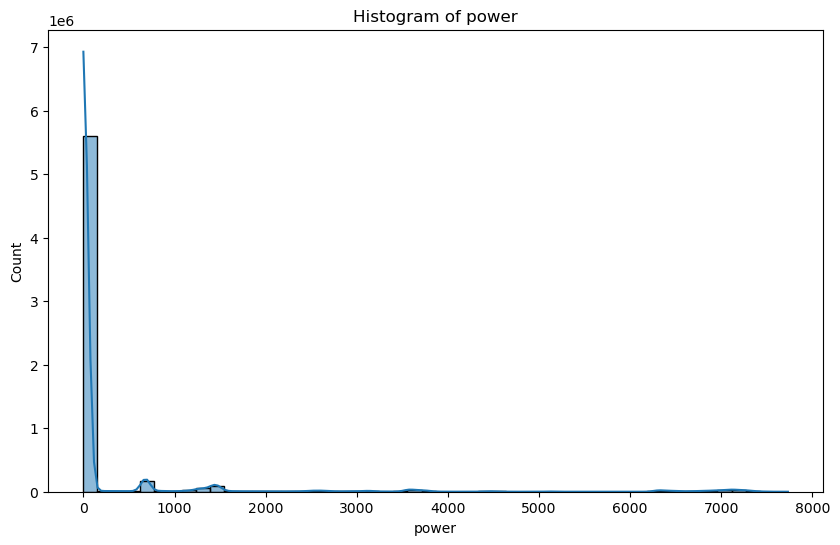

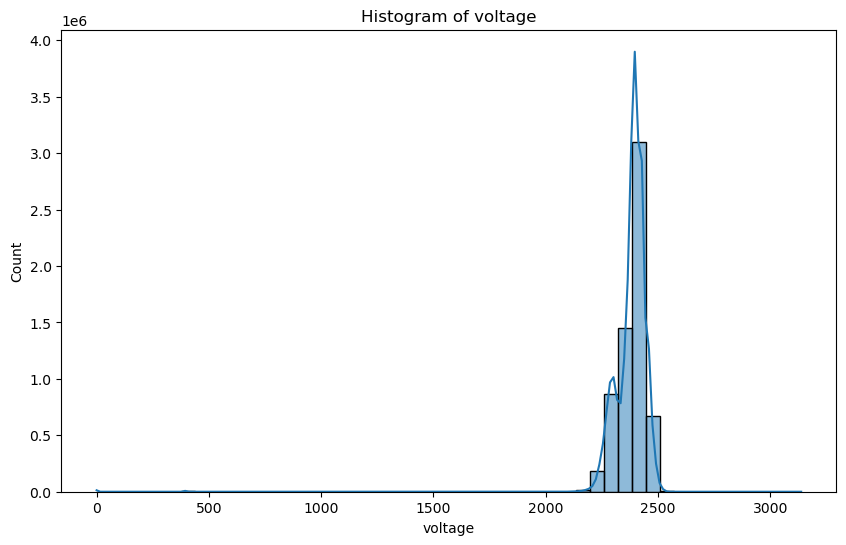

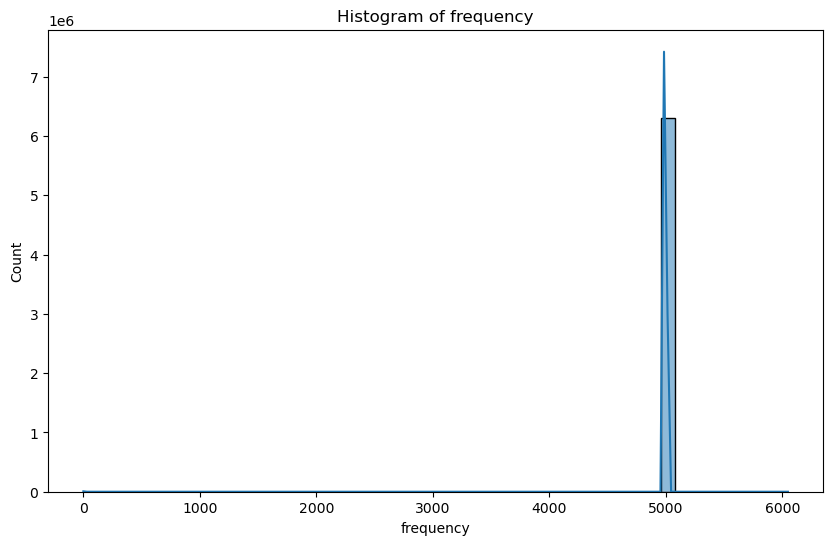

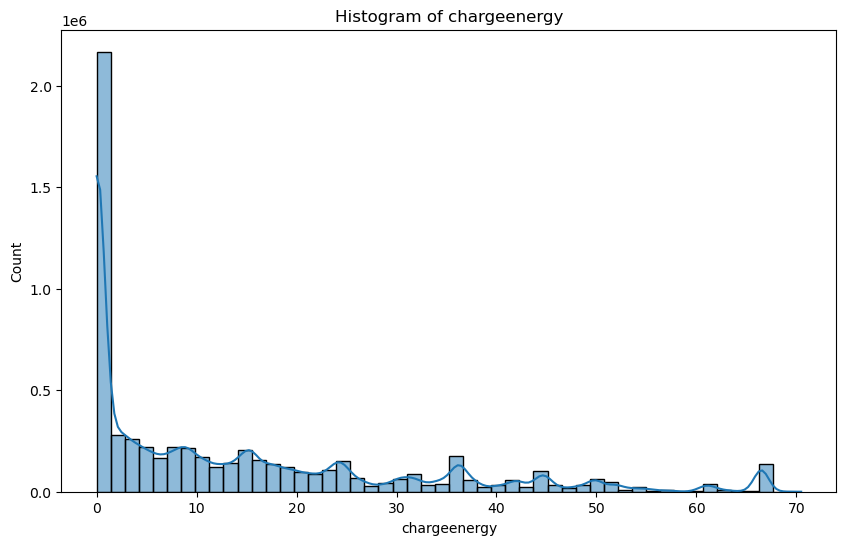

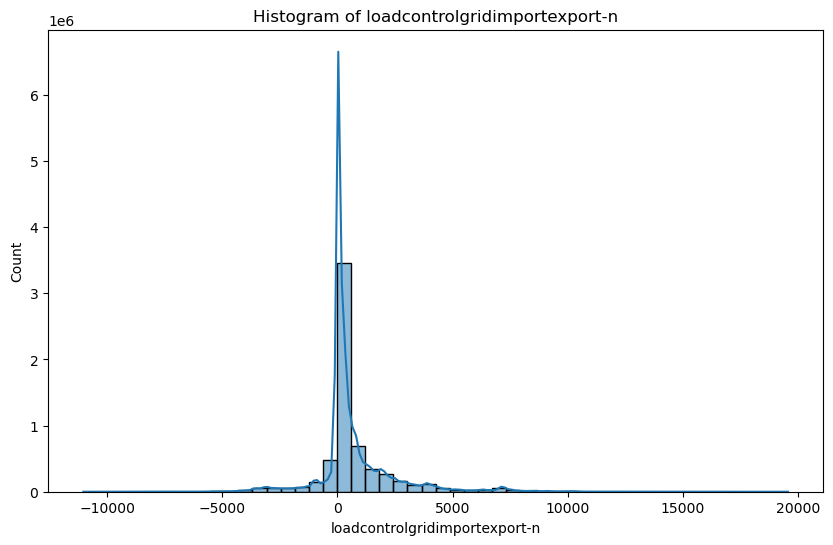

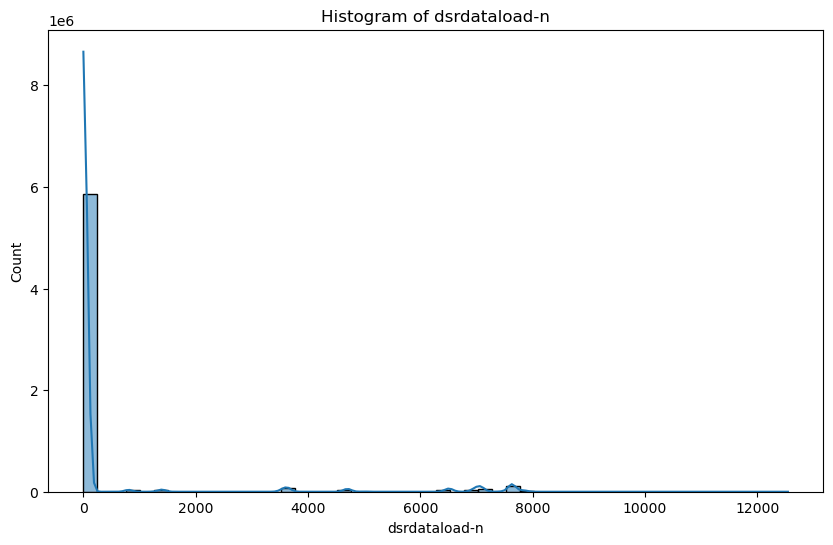

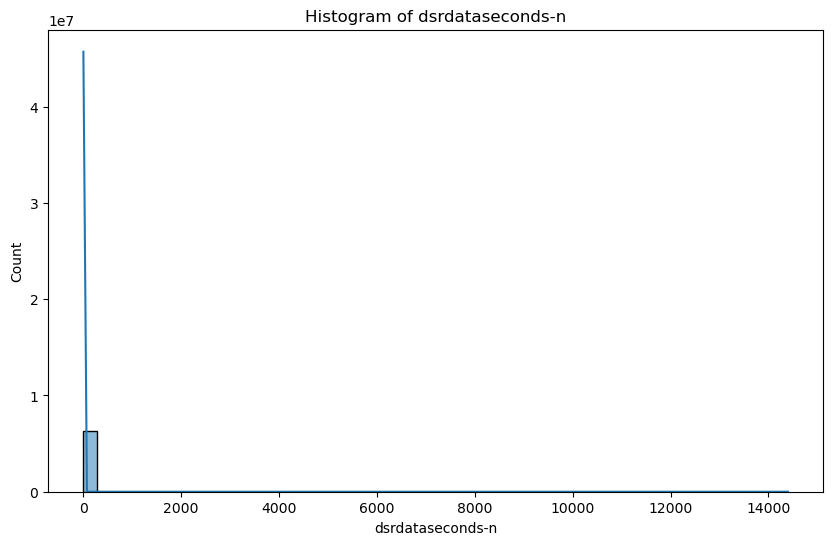

In [26]:
### Histograms for numeric features

numeric_features = ['power', 'voltage', 'frequency', 'chargeenergy', 'loadcontrolgridimportexport-n', 'dsrdataload-n', 'dsrdataseconds-n']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

### BAR CHARTS

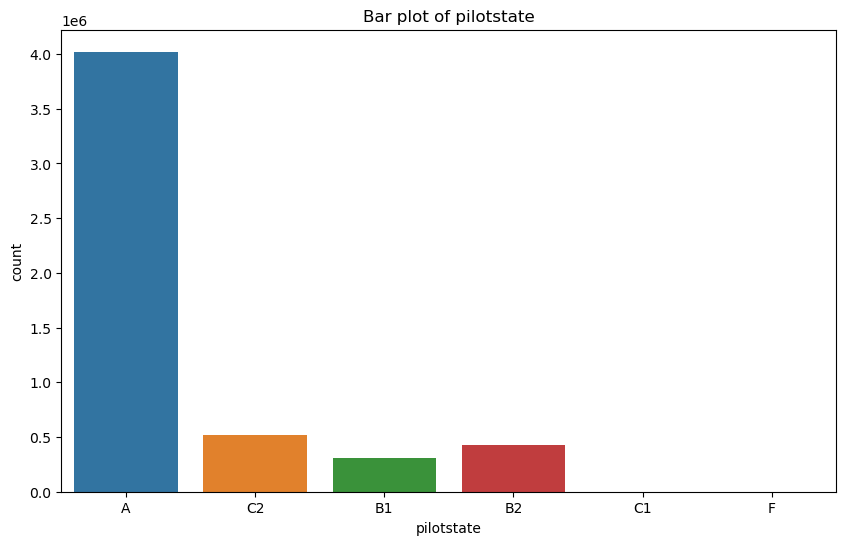

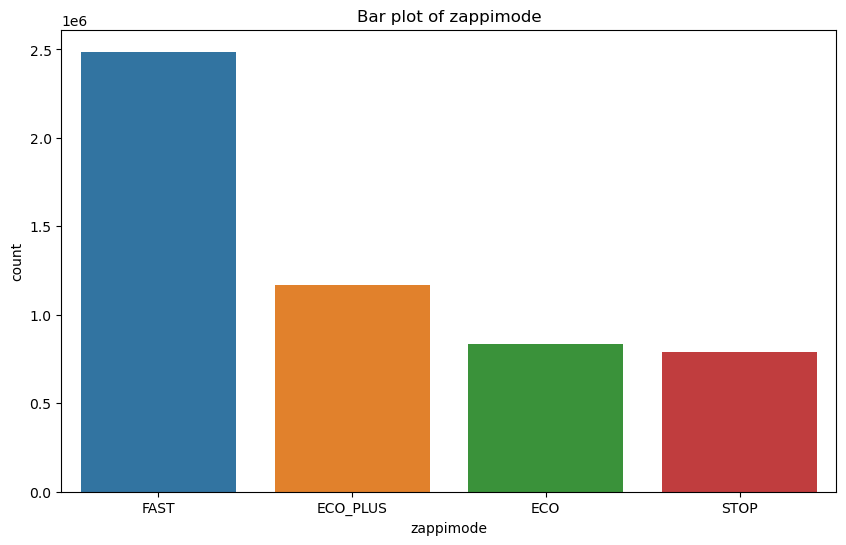

In [28]:
# Bar plots for categorical features
categorical_features = ['pilotstate', 'zappimode']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Bar plot of {feature}')
    plt.show()

### CORRELATION HEATMAP

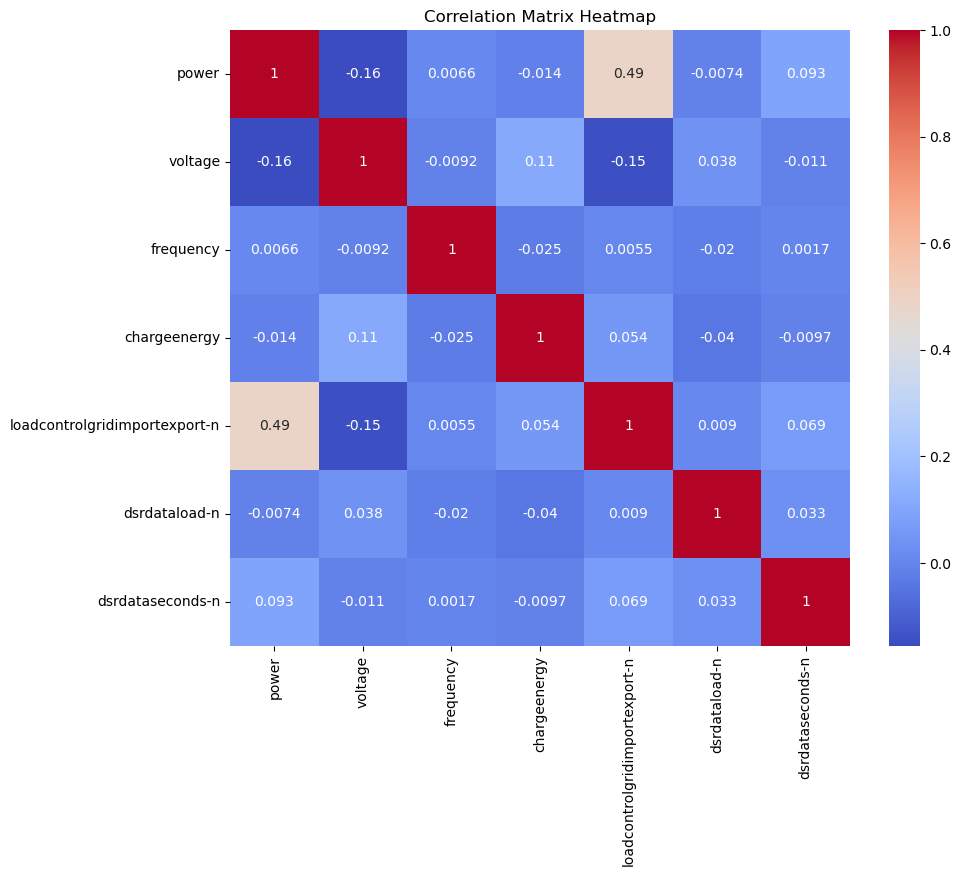

In [27]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

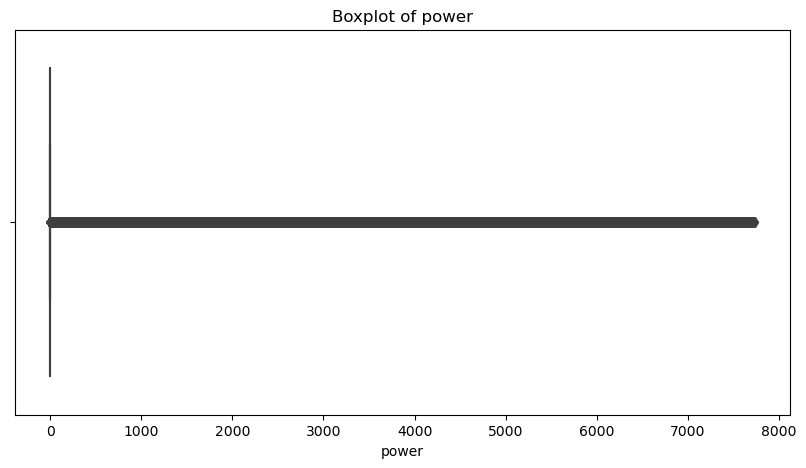

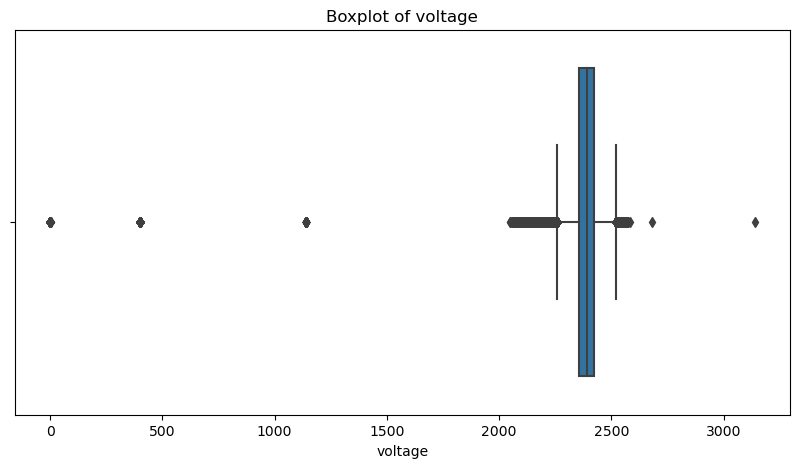

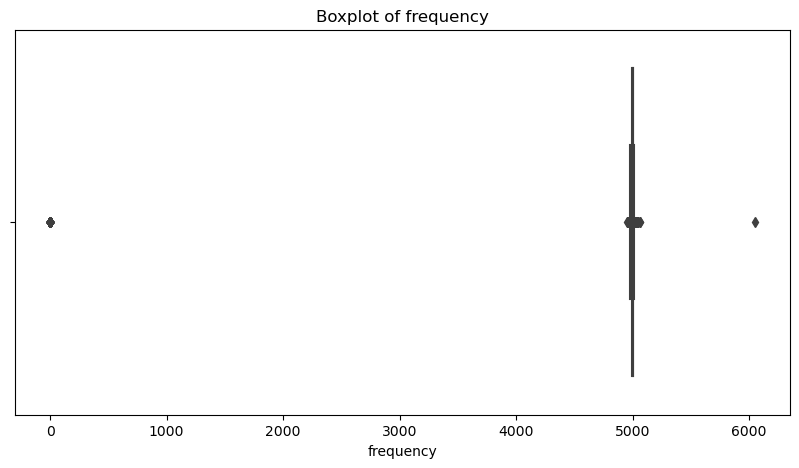

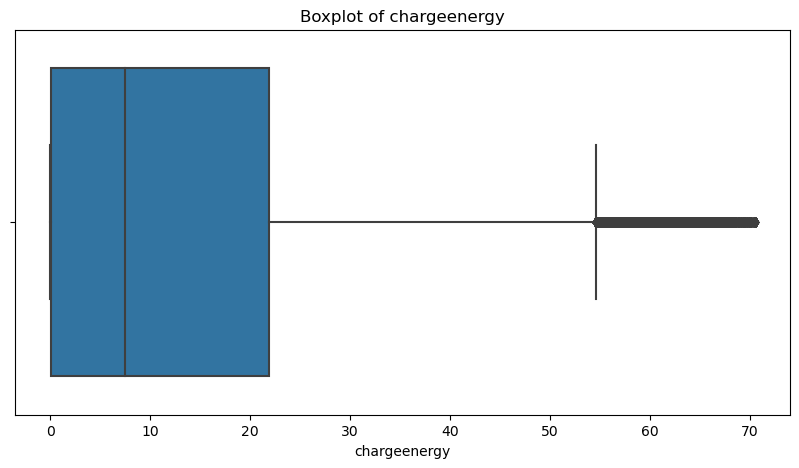

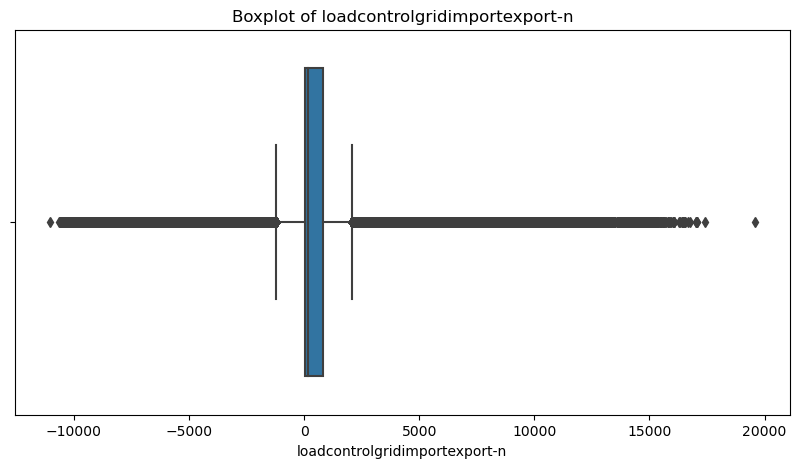

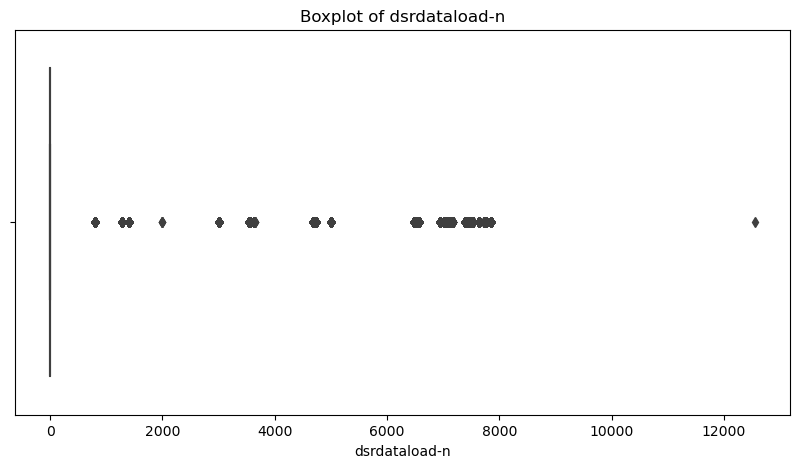

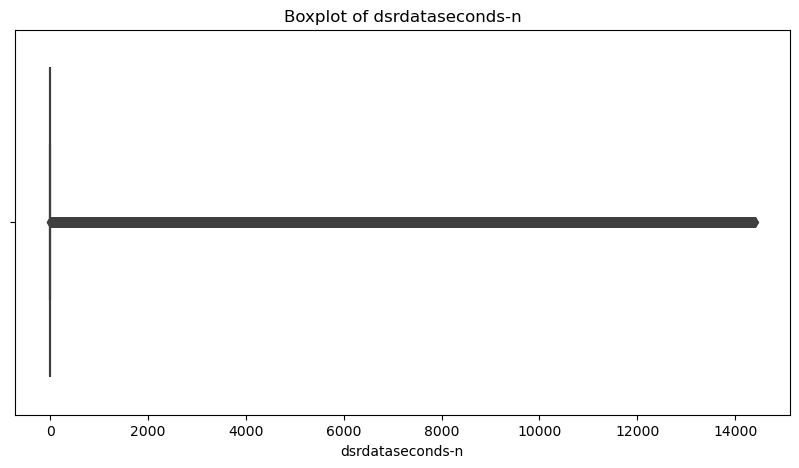

In [33]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist() # get the list of numeric columns

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

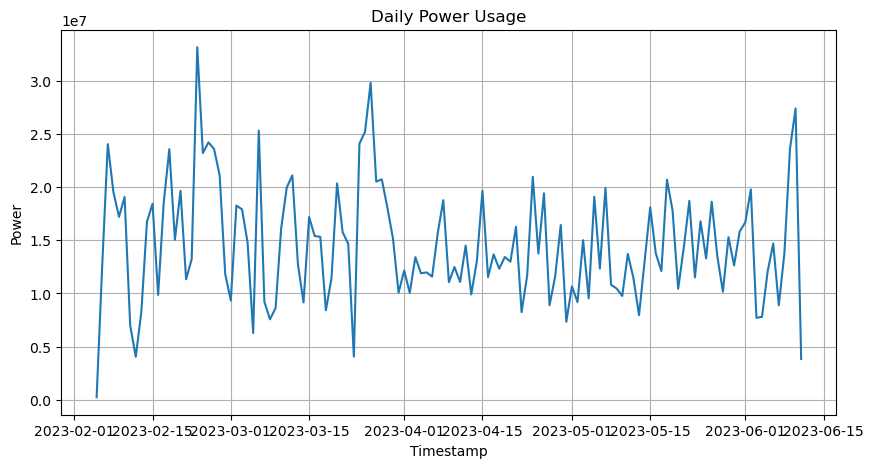

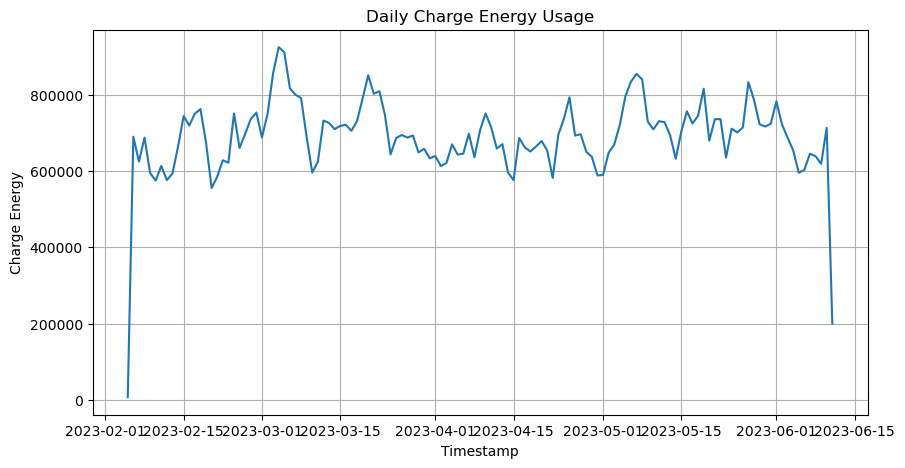

In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Parse strings to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

# Ensure data is sorted by date
df = df.sort_values('timestamp')

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Aggregate power and chargeenergy on daily level
daily_df = df.resample('D').sum() 

# Plotting power and chargeenergy daily patterns

# Power
plt.figure(figsize=(10,5))
plt.plot(daily_df.index, daily_df['power'])
plt.title('Daily Power Usage')
plt.ylabel('Power')
plt.xlabel('Timestamp')
plt.grid(True)
plt.show()

# Chargeenergy
plt.figure(figsize=(10,5))
plt.plot(daily_df.index, daily_df['chargeenergy'])
plt.title('Daily Charge Energy Usage')
plt.ylabel('Charge Energy')
plt.xlabel('Timestamp')
plt.grid(True)
plt.show()